In [39]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [40]:
data = [12,14,15,18,21,25,26,27,30,31,32,35,38,41,46,48,52,
        56,57,60,65,68,73,11,13,16,17,19,20,22,23,24,26,28,29,33,
        34,36,37,39,40,42,44,45,47,49,51]

In [41]:
#Выборочное средние и выборочная дисперсия

sample_mean = math.floor(np.mean(data))
sample_var = math.floor(np.var(data))
sample_std = math.floor(np.std(data,ddof=1))
print(f'Выборочные средняя - {sample_mean}, дисперссия - {sample_var}\nCтандартное отклонение {sample_std}')

Выборочные средняя - 34, дисперссия - 243
Cтандартное отклонение 15


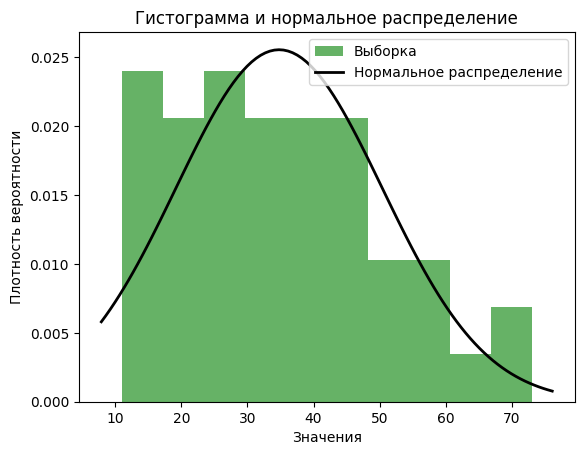

In [42]:
# Построение гистограммы выборки данных
plt.hist(data, bins=10, density=True, alpha=0.6, color='g', label='Выборка')

# Параметры нормального распределения для выборки данных
mu, std = np.mean(data), np.std(data)

# Построение теоретической кривой нормального распределения
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Нормальное распределение')

plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.title('Гистограмма и нормальное распределение')
plt.legend()
plt.show()

In [43]:
n = len(data)
a0 = 35
print(n)
t_statistic = (sample_mean - a0) / (sample_std / np.sqrt(n))
print('t-критерий: ', t_statistic)

47
t-критерий:  -0.45704364002673625


In [44]:
from scipy.stats import ttest_1samp

# Одновыборочный t-тест
t_stat, p_value = ttest_1samp(data, a0)

# Степени свободы
degrees_of_freedom = n - 1

print("t-статистика:", t_stat)
print("p-значение:", p_value)
# Предполагаемое уровень значимости
alpha = 0.05
print()
# Проверка условия и автоматическое определение знака
if p_value > alpha:
    print(f'Т.к {p_value} > {alpha}, то мы не можем отвергнуть нашу гипотезу, что наша выборочная средняя отличается от генеральной')
else:
    print(f'Т.к {p_value} <= {alpha}, то мы отвергаем нашу гипотезу, что наша выборочная средняя отличается от генеральной')


t-статистика: -0.09242256073785766
p-значение: 0.9267636612879746

Т.к 0.9267636612879746 > 0.05, то мы не можем отвергнуть нашу гипотезу, что наша выборочная средняя отличается от генеральной


In [45]:
from scipy.stats import t
# Критическое значение для одностороннего теста вправо
critical_value = t.ppf(1 - alpha, degrees_of_freedom)

# Проверка односторонней альтернативной гипотезы вправо
if t_stat > critical_value:
    print("Отвергаем нулевую гипотезу вправо")
else:
    print("Не отвергаем нулевую гипотезу вправо")
# Проверка односторонней альтернативной гипотезы влево
if t_stat < critical_value:
    print("Отвергаем нулевую гипотезу влево")
else:
    print("Не отвергаем нулевую гипотезу влево")


Не отвергаем нулевую гипотезу вправо
Отвергаем нулевую гипотезу влево
